<center><img src="https://cdn.corporate.walmart.com/dims4/WMT/71169a3/2147483647/strip/true/crop/2389x930+0+0/resize/980x381!/quality/90/?url=https%3A%2F%2Fcdn.corporate.walmart.com%2Fd6%2Fe7%2F48e91bac4a8ca8f22985b3682370%2Fwalmart-logos-lockupwtag-horiz-blu-rgb.png" alt="WALMART LOGO" /></center>

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting


## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Part 1 : EDA and data preprocessing

Start your project by exploring your dataset : create figures, compute some statistics etc...

Then, you'll have to make some preprocessing on the dataset. You can follow the guidelines from the *preprocessing template*. There will also be some specific transformations to be planned on this dataset, for example on the *Date* column that can't be included as it is in the model. Below are some hints that might help you 🤓

 #### Preprocessing to be planned with pandas

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.
 
**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

**Drop lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*
 


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

 **------------**

 #### Preprocessings to be planned with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

### Part 2 : Baseline model (linear regression)
Once you've trained a first model, don't forget to assess its performances on the train and test sets. Are you satisfied with the results ?
Besides, it would be interesting to analyze the values of the model's coefficients to know what features are important for the prediction. To do so, the `.coef_` attribute of scikit-learn's LinearRegression class might be useful. Please refer to the following link for more information 😉 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Part 3 : Fight overfitting
In this last part, you'll have to train a **regularized linear regression model**. You'll find below some useful classes in scikit-learn's documentation :
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

**Bonus question**

In regularized regression models, there's a hyperparameter called *the regularization strength* that can be fine-tuned to get the best generalized predictions on a given dataset. This fine-tuning can be done thanks to scikit-learn's GridSearchCV class : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

---

## EDA & Data Preprocessing

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [251]:

df = pd.read_csv(r"C:\Users\swell\OneDrive\Bureau\Data_Science_Fullstack\fullstack-data-certification\BLOC_3_ML\walmart\Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [253]:
df['year'] = pd.DatetimeIndex(df['Date'], dayfirst=True).year
df['month'] = pd.DatetimeIndex(df['Date'], dayfirst=True).month
df['day'] = pd.DatetimeIndex(df['Date'], dayfirst=True).day
df['day_of_week'] = pd.DatetimeIndex(df['Date'], dayfirst=True).dayofweek

In [254]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936,2012.0,7.0,27.0,4.0
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0


In [255]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
 8   year          132 non-null    float64
 9   month         132 non-null    float64
 10  day           132 non-null    float64
 11  day_of_week   132 non-null    float64
dtypes: float64(11), object(1)
memory usage: 14.2+ KB
(150, 12)


Data cleaning and processing :

In [256]:
df = df.dropna(subset=['Weekly_Sales'])

# df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by ='Date').reset_index(drop=True)
df['Temperature'] = round((df['Temperature'] -32)*5/9,2)

df['Temperature'] = df['Temperature'].apply(lambda x: np.nan if (np.abs(x - df['Temperature'].mean()) / df['Temperature'].std() > 3) else x)
df['Fuel_Price'] = df['Fuel_Price'].apply(lambda x: np.nan if (np.abs(x - df['Fuel_Price'].mean()) / df['Fuel_Price'].std() > 3) else x)
df['CPI'] = df['CPI'].apply(lambda x: np.nan if (np.abs(x - df['CPI'].mean()) / df['CPI'].std() > 3) else x)
df['Unemployment'] = df['Unemployment'].apply(lambda x: np.nan if (np.abs(x - df['Unemployment'].mean()) / df['Unemployment'].std() > 3) else x)

In [257]:
df = df.dropna(thresh=6)
# dropping row if more than 2 features are missing in the same row

In [258]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,13.0,01-06-2012,2035431.39,0.0,16.17,3.788,130.959226,5.965,2012.0,6.0,1.0,4.0
1,17.0,01-10-2010,829207.27,0.0,15.59,2.853,126.234600,6.885,2010.0,10.0,1.0,4.0
2,10.0,02-03-2012,1990371.02,0.0,14.23,3.882,130.645793,7.545,2012.0,3.0,2.0,4.0
3,7.0,02-04-2010,561145.14,0.0,3.48,2.725,189.704822,8.963,2010.0,4.0,2.0,4.0
4,19.0,02-07-2010,1549018.68,0.0,19.03,2.958,132.521867,8.099,2010.0,7.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,2.0,NaN,1797732.56,0.0,24.68,3.786,215.154482,7.931,NaN,NaN,NaN,NaN
130,17.0,NaN,1046782.52,0.0,20.51,3.630,NaN,5.936,NaN,NaN,NaN,NaN
132,18.0,NaN,1087051.26,0.0,20.97,3.815,135.446800,8.890,NaN,NaN,NaN,NaN
133,18.0,NaN,1048134.24,0.0,22.92,3.840,138.185710,8.535,NaN,NaN,NaN,NaN


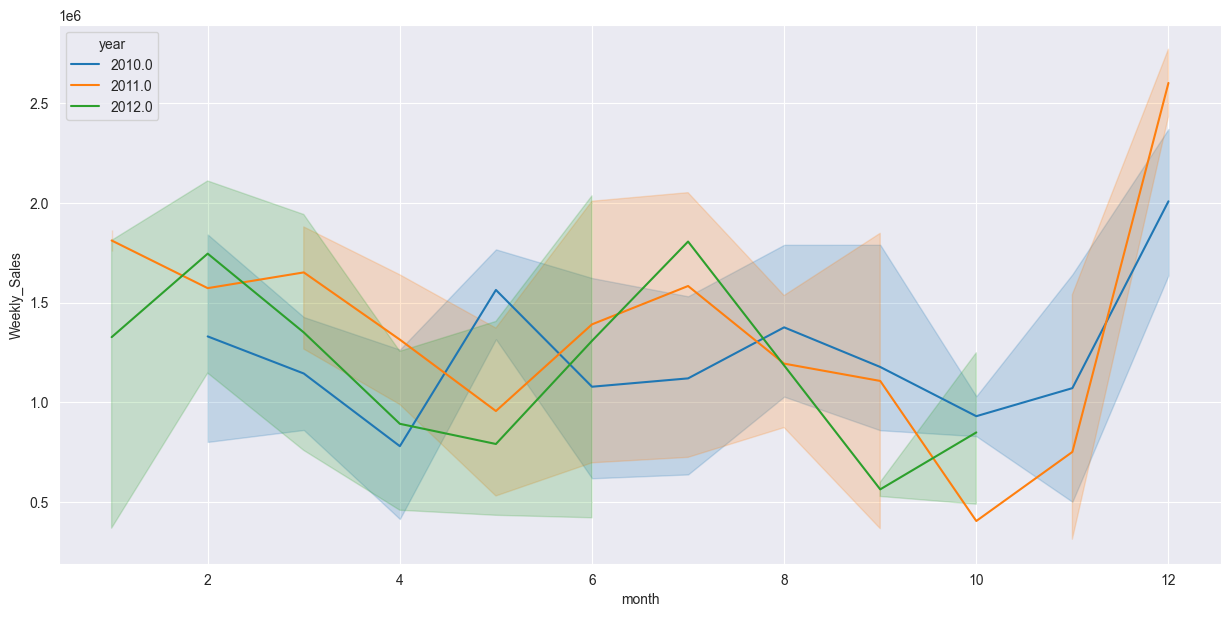

In [259]:
# df.loc['Year'] = df['Date'].dt.year
# df.loc['Month'] = df['Date'].dt.month
# df.loc['Day'] = df['Date'].dt.day
# df.loc['Day_of_Week'] = df['Date'].dt.day_of_week

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x='month',y='Weekly_Sales',hue='year',palette='tab10')
plt.show()

In [260]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sales").sort_values(by="Total_Sales",ascending=False)


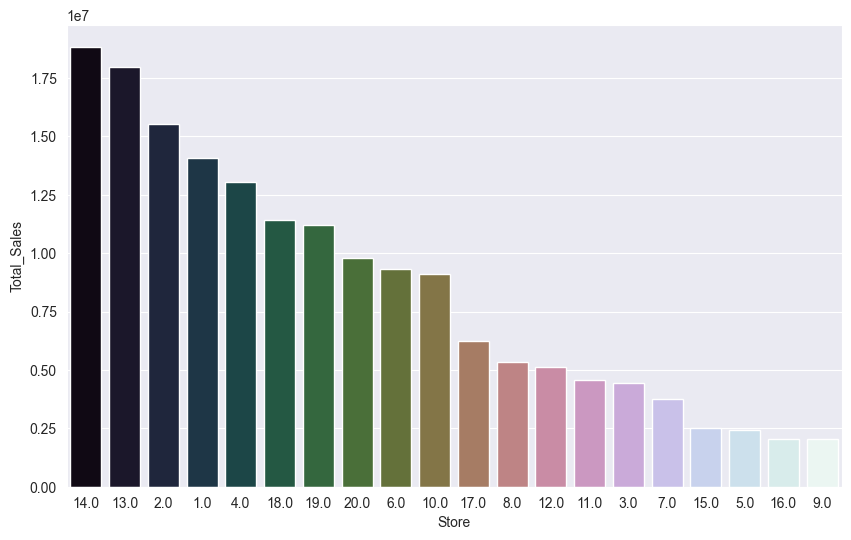

In [261]:
plt.figure(figsize=(10,6))
sns.barplot(x=store_sales['Store'],y=store_sales['Total_Sales'],order=store_sales['Store'], palette='cubehelix')
plt.show()

In [262]:
print(f"Average total sales for one store is ${round(store_sales['Total_Sales'].mean(),2)} out of {len(store_sales)} stores.")
print(f"50 % of the stores drive {round(store_sales.Total_Sales.iloc[:10].sum()/store_sales.Total_Sales.sum()*100,2)} % of all sales.")

Average total sales for one store is $8441814.15 out of 20 stores.
50 % of the stores drive 77.17 % of all sales.


In [263]:
print(df.isna().sum().sort_values())

Store            0
Weekly_Sales     0
Holiday_Flag    10
CPI             10
Fuel_Price      12
Temperature     14
Date            16
year            16
month           16
day             16
day_of_week     16
Unemployment    17
dtype: int64


In [264]:
df = df.dropna(subset=["Date", "Weekly_Sales"])
print(df.isna().sum().sort_values())

Store            0
Date             0
Weekly_Sales     0
year             0
month            0
day              0
day_of_week      0
Holiday_Flag     9
CPI              9
Temperature     11
Fuel_Price      11
Unemployment    16
dtype: int64


In [265]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,13.0,01-06-2012,2035431.39,0.0,16.17,3.788,130.959226,5.965,2012.0,6.0,1.0,4.0
1,17.0,01-10-2010,829207.27,0.0,15.59,2.853,126.234600,6.885,2010.0,10.0,1.0,4.0
2,10.0,02-03-2012,1990371.02,0.0,14.23,3.882,130.645793,7.545,2012.0,3.0,2.0,4.0
3,7.0,02-04-2010,561145.14,0.0,3.48,2.725,189.704822,8.963,2010.0,4.0,2.0,4.0
4,19.0,02-07-2010,1549018.68,0.0,19.03,2.958,132.521867,8.099,2010.0,7.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113,6.0,30-04-2010,1498080.16,NaN,20.51,2.780,211.894272,7.092,2010.0,4.0,30.0,4.0
114,6.0,30-07-2010,1532308.78,0.0,NaN,2.640,212.894485,6.973,2010.0,7.0,30.0,4.0
115,19.0,30-07-2010,1366395.96,0.0,22.68,2.932,132.598387,8.099,2010.0,7.0,30.0,4.0
116,5.0,30-07-2010,268929.03,0.0,28.03,2.640,211.927001,6.496,2010.0,7.0,30.0,4.0


In [266]:
# mean and standard dev
std = df['Weekly_Sales'].std()
mean = df['Weekly_Sales'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim outliers
trimmed_df = df[(df['Weekly_Sales'] < upper) \
                           & (df['Weekly_Sales'] > lower)]

# The trimmed box plot
#trimmed_df[['Weekly_Sales']].boxplot()
#plt.show()

trimmed_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,13.0,01-06-2012,2035431.39,0.0,16.17,3.788,130.959226,5.965,2012.0,6.0,1.0,4.0
1,17.0,01-10-2010,829207.27,0.0,15.59,2.853,126.234600,6.885,2010.0,10.0,1.0,4.0
2,10.0,02-03-2012,1990371.02,0.0,14.23,3.882,130.645793,7.545,2012.0,3.0,2.0,4.0
3,7.0,02-04-2010,561145.14,0.0,3.48,2.725,189.704822,8.963,2010.0,4.0,2.0,4.0
4,19.0,02-07-2010,1549018.68,0.0,19.03,2.958,132.521867,8.099,2010.0,7.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113,6.0,30-04-2010,1498080.16,NaN,20.51,2.780,211.894272,7.092,2010.0,4.0,30.0,4.0
114,6.0,30-07-2010,1532308.78,0.0,NaN,2.640,212.894485,6.973,2010.0,7.0,30.0,4.0
115,19.0,30-07-2010,1366395.96,0.0,22.68,2.932,132.598387,8.099,2010.0,7.0,30.0,4.0
116,5.0,30-07-2010,268929.03,0.0,28.03,2.640,211.927001,6.496,2010.0,7.0,30.0,4.0


In [267]:
null_columns = (df.isnull().sum(axis=0)/len(df))
null_columns

Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    0.076271
Temperature     0.093220
Fuel_Price      0.093220
CPI             0.076271
Unemployment    0.135593
year            0.000000
month           0.000000
day             0.000000
day_of_week     0.000000
dtype: float64

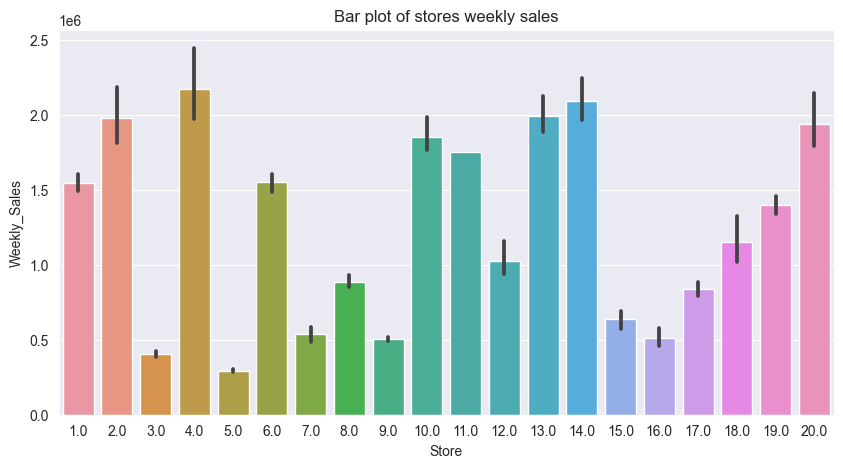

In [268]:
# bar plot of the stores weekly sales
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
g = sns.barplot(data = trimmed_df, x = 'Store', y = 'Weekly_Sales')
g.set_title("Bar plot of stores weekly sales")
plt.show()

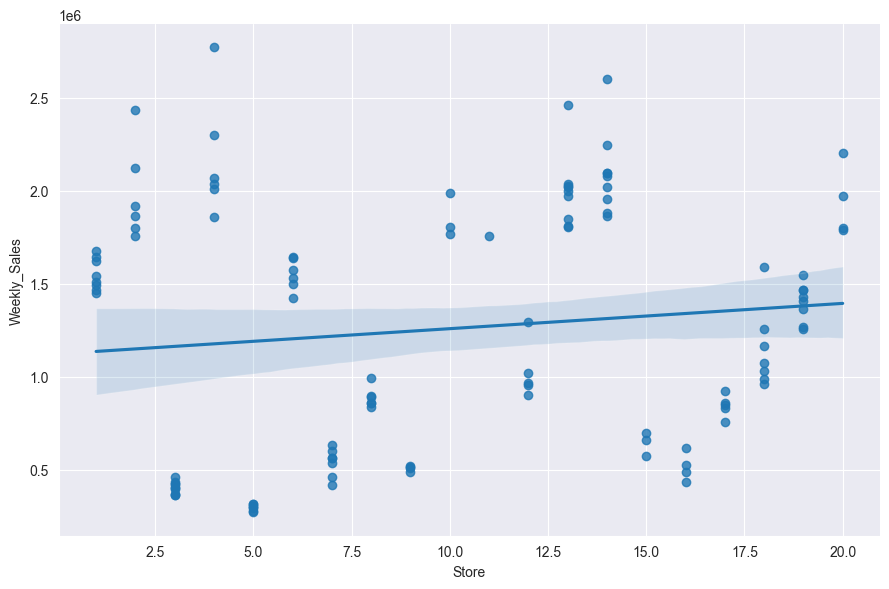

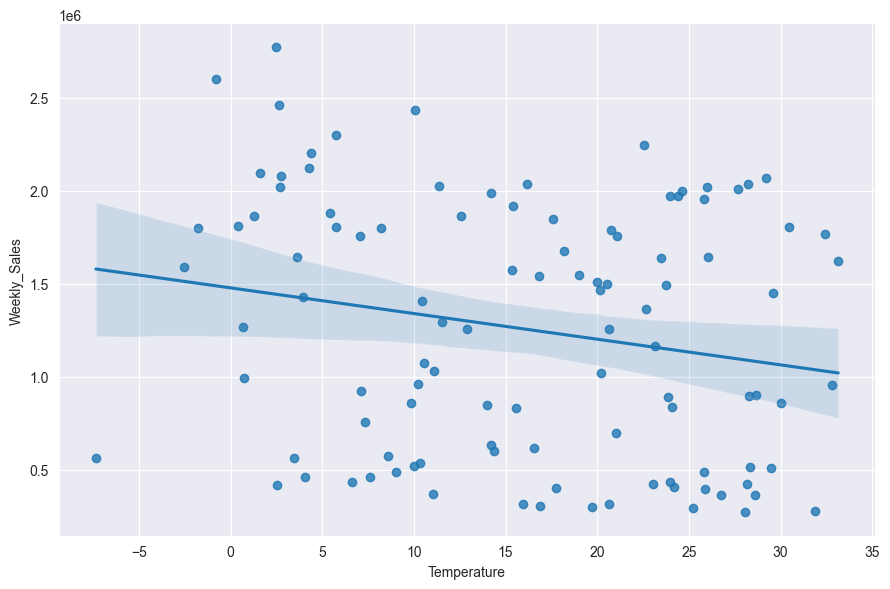

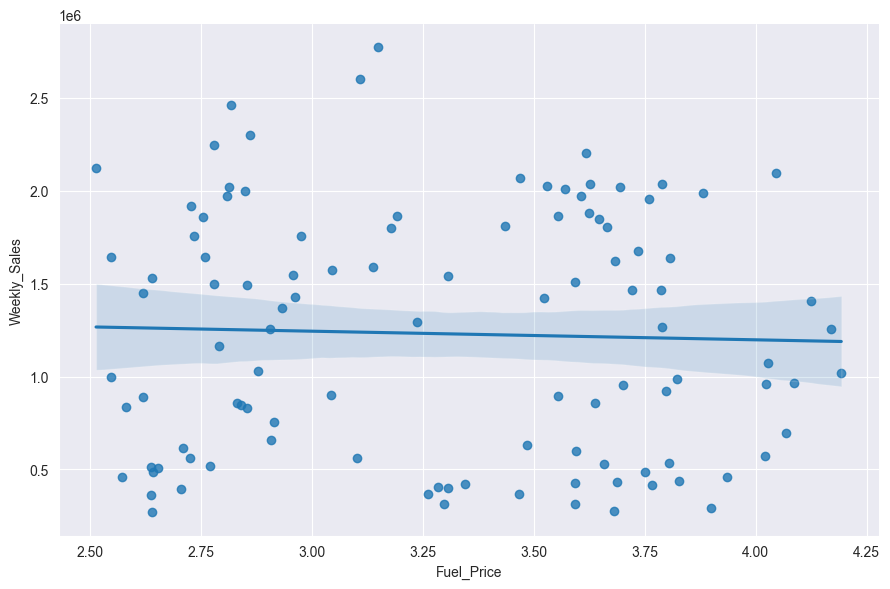

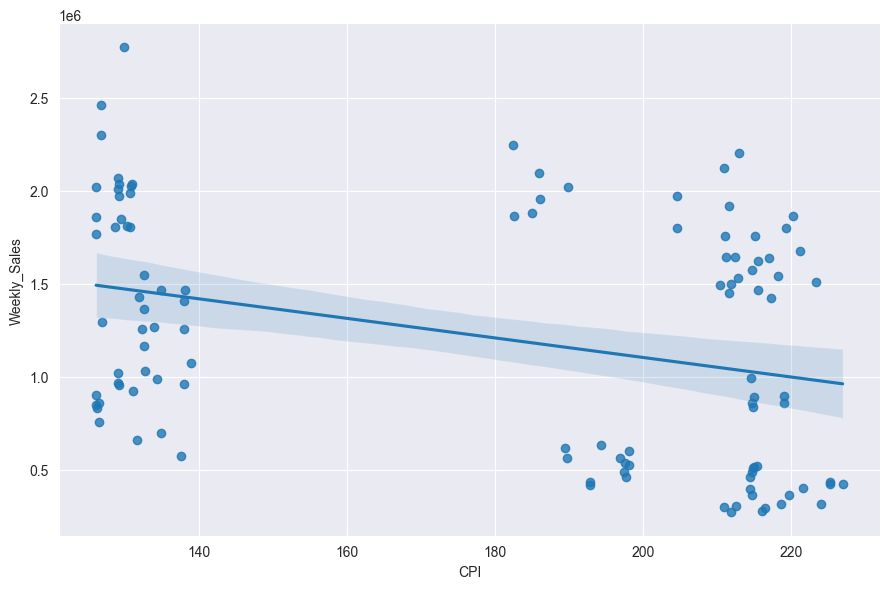

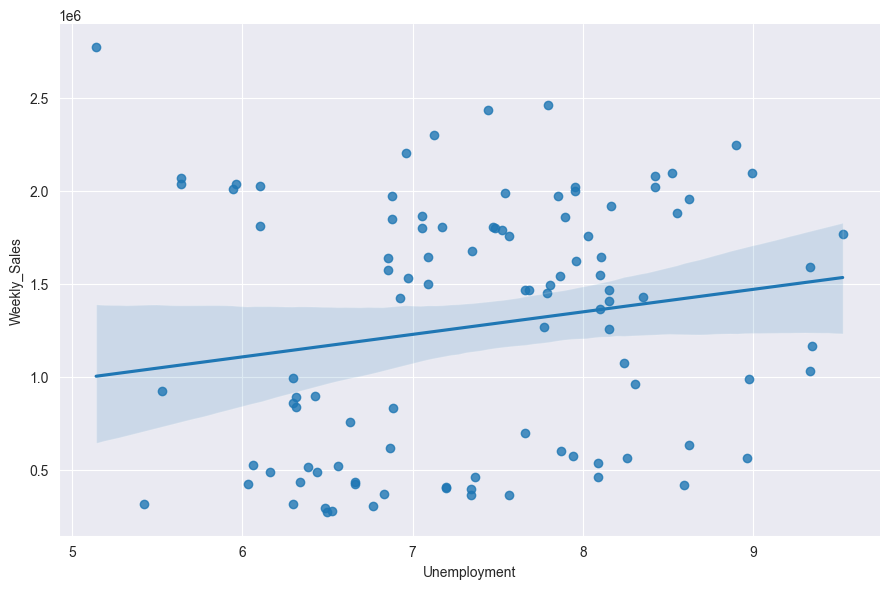

In [269]:
import matplotlib.pyplot as plt
import plotly.express as px

view = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in view:
    sns.lmplot(data=df,y='Weekly_Sales',x=col,height=6,aspect=1.5)
    plt.show()

<AxesSubplot: >

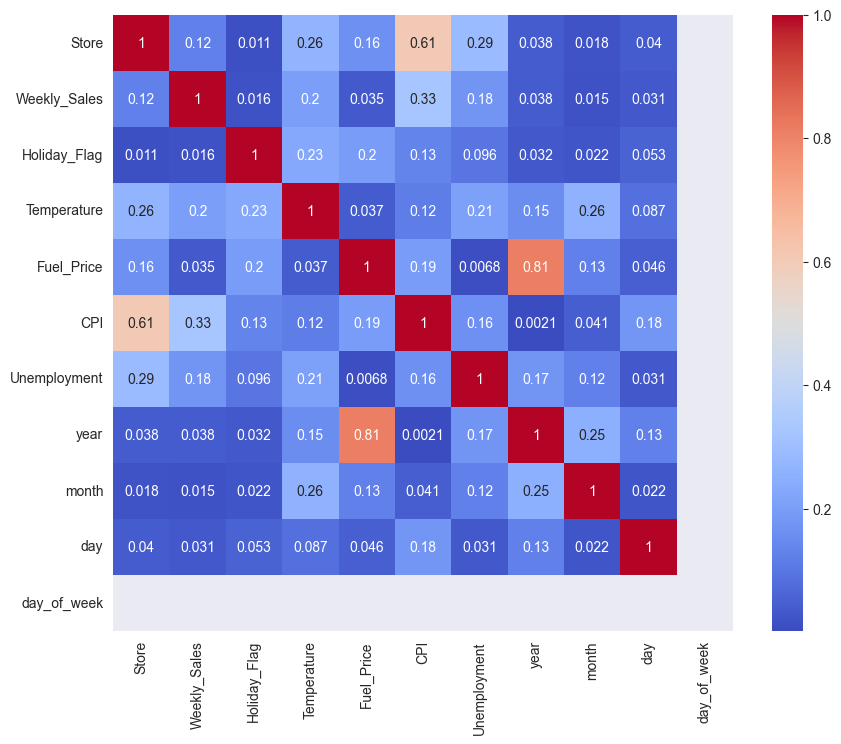

In [270]:
plt.figure(figsize=(10,8))
df_corr=df.corr(numeric_only=True)
sns.heatmap(abs(df_corr),annot=True, cmap='coolwarm')

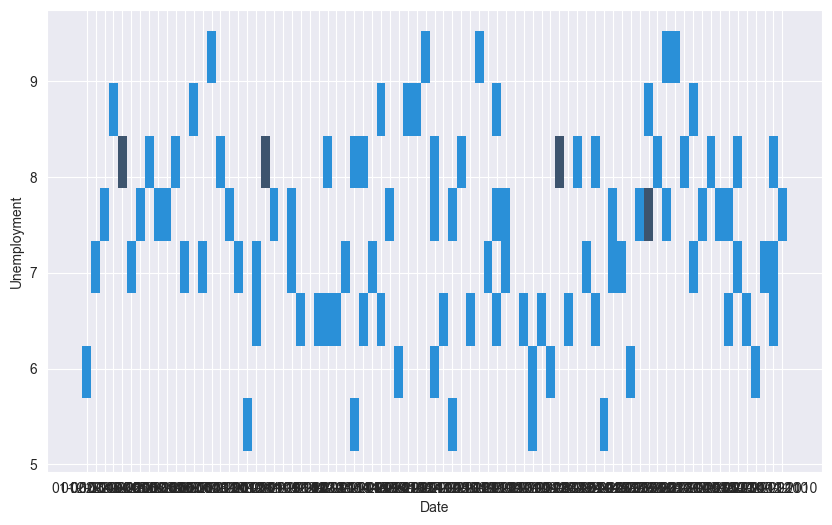

In [271]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Date',y='Unemployment')
plt.show()

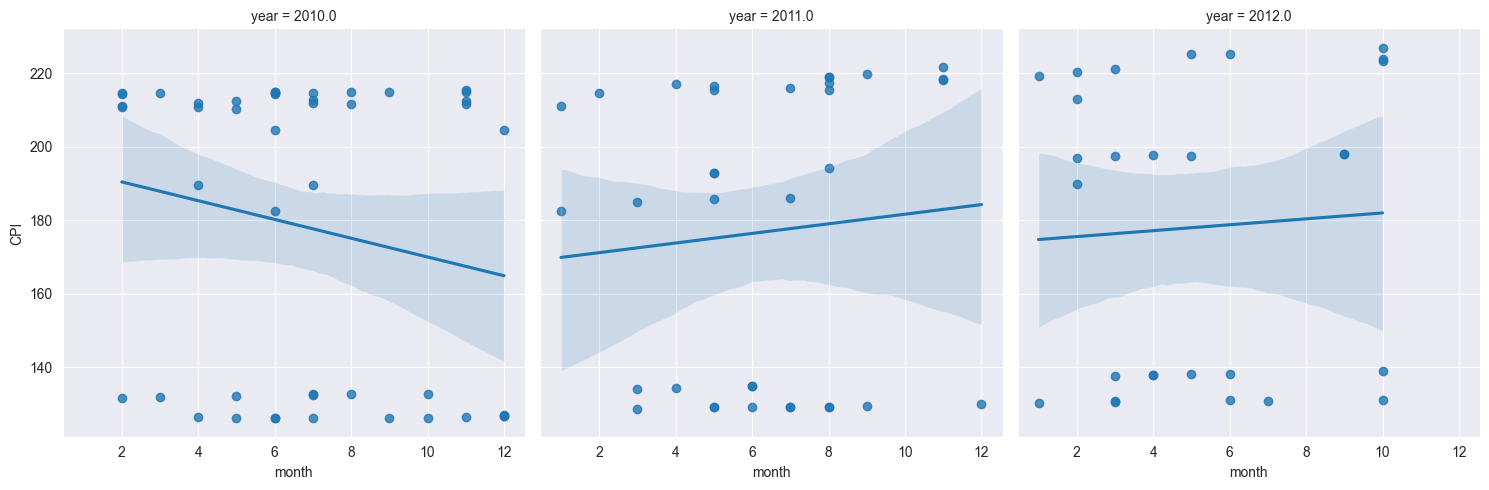

In [272]:
sns.lmplot(data=trimmed_df, x="month", y="CPI",col='year')
plt.show()

In [273]:
trimmed_df.dropna(subset=['CPI'],inplace=True)

In [274]:
trimmed_df['Holiday_Flag'] = df['Holiday_Flag'].map({1:'Yes',0:'No'})


print(f"Weekly sales around holidays are $ {round(df[df['Holiday_Flag'] == 'Yes']['Weekly_Sales'].mean(),2)}, which is above the average of \
$ {round(df['Weekly_Sales'].mean(),2)}, though the difference is well below standard deviation of $ {round(df['Weekly_Sales'].std(),2)}.")

Weekly sales around holidays are $ nan, which is above the average of $ 1257271.14, though the difference is well below standard deviation of $ 662505.57.


In [275]:
X = trimmed_df.drop(['Date','Weekly_Sales'],axis=1)
y = trimmed_df['Weekly_Sales']

In [276]:
numeric_features = ['Temperature', 'Fuel_Price','CPI', 'Unemployment']
categorical_features = ['Store','Holiday_Flag','year','month','day','day_of_week']

In [277]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', KNNImputer()),
        ('scaler',StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [278]:
preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

In [279]:
X = trimmed_df.drop(['Date','Weekly_Sales'],axis=1)
y = trimmed_df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [280]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning:

Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros



In [281]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
Y_test_pred = lin_reg.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on train set :  0.9973640331014907
Standard deviation on train set : 0.08594414436660826
R2 score on test set :  0.8763490042730823


In [282]:
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])

feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

NameError: name 'column_names' is not defined

In [283]:
model = Ridge()
params = {'alpha':[0.01, 0.02, 0.05, 0.1, 0.5, 1, 10]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 10,scoring='r2') 
gridsearch.fit(X_train, y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print("Test set accuracy : ", gridsearch.score(X_test, y_test))

Best hyperparameters :  {'alpha': 0.01}
Best validation accuracy :  0.8869671343875549
Test set accuracy :  0.8941912774317957


In [284]:
model = Lasso(max_iter=2500)
params = {'alpha':[0.1, 1, 10, 100, 500, 1000]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 10,scoring='r2')
gridsearch.fit(X_train, y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print("Test set accuracy : ", gridsearch.score(X_test, y_test))


C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 32392203032.912388, tolerance: 3278296830.213695

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 23707708867.08899, tolerance: 3157327879.6375074

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Dual

Best hyperparameters :  {'alpha': 10}
Best validation accuracy :  0.885838602406641
Test set accuracy :  0.822506489512085


C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5742180234.851135, tolerance: 3278425074.476814

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 27541348586.69668, tolerance: 3687876466.317095



In [286]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on train set :  0.9973254499933643
Standard deviation on train set : 0.2393314670082022
R2 score on test set :  0.8195324214084041


C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 46211305683.45827, tolerance: 3687876466.317095

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 32560510030.611694, tolerance: 3278296830.213695

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duali

In [285]:
lasso = Lasso(alpha=500)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on train set :  0.9947583689724433
Standard deviation on train set : 0.19071446531079736
R2 score on test set :  0.8688199325721605
